<a href="https://colab.research.google.com/github/patauch/Traffic-classification-ensemble-methods/blob/main/dataset_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, roc_auc_score
from collections import OrderedDict

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
class DataPreproc:

    def __init__(self):
        self.data = self.load_data()
        self.x_train, self.x_test, self.y_train, self.y_test = self.preprocessing()

    def load_data(self):
        header = ["duration", "protocol_type", "service", "flag", "src_bytes",
                  "dst_bytes", "land", "wrong_fragment", "urgent", "hot", 
                  "num_failed_logins", "logged_in", "num_compromised", "root_shell",
                  "su_attempted", "num_root", "num_file_creations", "num_shells", 
                  "num_access_files", "num_outbound_cmds", "is_host_login", 
                  "is_guest_login", "count", "srv_count", "serror_rate",
                  "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
                  "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", 
                  "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
                  "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                  "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
                  "dst_host_srv_serror_rate","dst_host_rerror_rate", 
                  "dst_host_srv_rerror_rate", "label", "diff"]
        data_train = pd.read_csv("/content/drive/MyDrive/Kursach/NSL-KDD/KDDTrain+.txt", names=header)
        data_train.drop_duplicates(keep='first')
        data_test = pd.read_csv("/content/drive/MyDrive/Kursach/NSL-KDD/KDDTest+.txt", names=header)
        data_test.drop_duplicates(keep='first')
        data = pd.concat([data_train, data_test], ignore_index='true')
        data = data.drop_duplicates(keep='first')
        return data

    def preprocessing(self):
        norm_data = pd.concat([self.data[self.data['label'] == 'normal'][0:1300],
                               self.data[self.data['label'] == 'neptune'][0:1300],
                               self.data[self.data['label'] == 'satan'][0:1300],
                               self.data[self.data['label'] == 'guess_passwd']
                              ], ignore_index=True)
        
        encodings = dict()
        for c in norm_data.columns:
            if norm_data[c].dtype == "object":
                encodings[c] = LabelEncoder()
                norm_data[c] = encodings[c].fit_transform(norm_data[c])
                print(encodings[c].get_params())
        x = norm_data.loc[:, "duration":"dst_host_srv_rerror_rate"].values
        y = norm_data.loc[:, "label"].values
        return train_test_split(x, y, test_size=0.25, random_state=42)



In [3]:
def learning(x_train, y_train):
    model_rf = RandomForestClassifier(n_estimators=25, random_state=42)
    model_rf.fit(x_train, y_train)
    model_ab = AdaBoostClassifier(n_estimators=23,
                                      random_state=42)
    model_ab.fit(x_train, y_train)
    return model_rf, model_ab

In [4]:
def testing(x_test, y_test, model_rf, model_ab):
    results_rf = model_rf.score(x_test, y_test)
    y_pred_rf = model_rf.predict(x_test)
    result_ab = model_ab.score(x_test, y_test)
    y_pred_ab = model_ab.predict(x_test)
    print("Random Forest results", results_rf)
    print("Confusion matrix for Random Forest\n", confusion_matrix(y_test, y_pred_rf))
    print("AdaBoost results", result_ab)
    print("Confusion matrix for AdaBoost\n", confusion_matrix(y_test, y_pred_ab))

In [5]:
def menu():
  learning_passed = False
  while True:
    print("Choose what to do\n")
    print("1. Start Learning\n")
    if (learning_passed):
      print("2. Start Testing\n")
    cond = input()
    if cond.isnumeric():
      cond = int(cond)
      if cond == 1:
          print("Starting learning\n")
          tester = DataPreproc()
          model_rf, model_ab = learning(tester.x_train,tester.y_train)
          learning_passed = True
          print("Ended Learning\n")
      elif cond == 2 and learning_passed:
          print("Starting testing\n")
          testing(tester.x_test, tester.y_test, model_rf, model_ab)
          print("Testing Ended\n")
          break
      else:
        print("Wrong input\n")
    else:
      print("Wrong input\n")

In [8]:
menu()

Choose what to do

1. Start Learning

1
Starting learning

{}
{}
{}
{}
Ended Learning

Choose what to do

1. Start Learning

2. Start Testing

2
Starting testing

Random Forest results 0.9984567901234568
Confusion matrix for Random Forest
 [[340   0   0   0]
 [  0 308   0   0]
 [  1   0 351   0]
 [  0   0   1 295]]
AdaBoost results 0.7939814814814815
Confusion matrix for AdaBoost
 [[127   0 213   0]
 [  0 300   8   0]
 [  0   0 310  42]
 [  1   0   3 292]]
Testing Ended



In [6]:
tester = DataPreproc()
model_rf, model_ab = learning(tester.x_train,tester.y_train)
header = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "diff"]

{}
{}
{}
{}


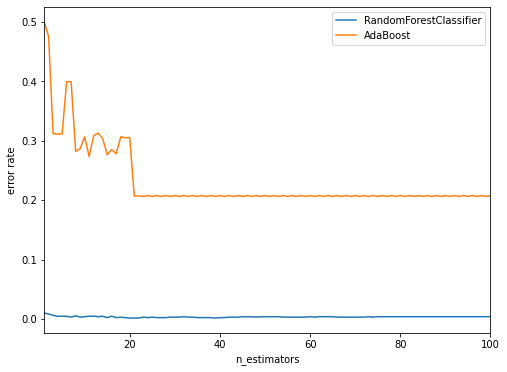

In [7]:
ensemble_clfs = [
    ("RandomForestClassifier",
        RandomForestClassifier(warm_start=True,
                              )),
    ("AdaBoost",
        AdaBoostClassifier())
    ]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
min_estimators = 1
max_estimators = 100
for label, model in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        model.set_params(n_estimators=i)
        model.fit(tester.x_train, tester.y_train)
        error = 1 - model.score(tester.x_test,tester.y_test)
        error_rate[label].append((i, error))
from matplotlib.pyplot import figure
plt.figure(figsize=(8,6))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
estimator = model_rf.estimators_[4]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = header[:-2],
                class_names = ["normal", "neptune", "satan", "guess_passwd"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Данная функция слишком затратна по памяти, поэтому результат её выполнения можно посмотреть по ссылке https://drive.google.com/file/d/1NdqTWe5EsW9geoV29njp3ceqzw4xtDsQ/view?usp=sharing